## Author : Loka Akash Reddy
### TechEdu - TIP Data Science October-2021
### Task 3 : Nobel Prize Distribution
### Dataset : https://drive.google.com/file/d/1B_DQcYgvnvVQd7mM6BKzg523yzge44oZ/view
### Importing required Libraries

In [1]:
import pandas as ps
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sn
from pandas_profiling import ProfileReport

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
# importing the dataset(csv file)

df = ps.read_csv('nobel_prize_by_winner.csv')

In [4]:
df

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,525,United Nations Children's Fund (UNICEF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1965.0,peace,NaN,1.0,NaN,NaN,NaN,NaN
968,527,International Labour Organization (I.L.O.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1969.0,peace,NaN,1.0,NaN,NaN,NaN,NaN
969,537,Amnesty International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1977.0,peace,NaN,1.0,NaN,NaN,NaN,NaN
970,547,International Physicians for the Prevention of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1985.0,peace,NaN,1.0,NaN,NaN,NaN,NaN


In [5]:
df.head(10)

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China
5,428,Barbara,McClintock,6/16/1902,9/2/1992,USA,US,"Hartford, CT",USA,US,"Huntington, NY",female,1983.0,medicine,NaN,1.0,"""for her discovery of mobile genetic elements""",Cold Spring Harbor Laboratory,"Cold Spring Harbor, NY",USA
6,773,Shirin,Ebadi,6/21/1947,0000-00-00,Iran,IR,Hamadan,NaN,NaN,NaN,female,2003.0,peace,NaN,1.0,"""for her efforts for democracy and human right...",NaN,NaN,NaN
7,597,Grazia,Deledda,09/27/1871,8/15/1936,Italy,IT,"Nuoro, Sardinia",Italy,IT,Rome,female,1926.0,literature,NaN,1.0,"""for her idealistically inspired writings whic...",NaN,NaN,NaN
8,615,Gabriela,Mistral,04/07/1889,1/10/1957,Chile,CL,Vicu_a,USA,US,"Hempstead, NY",female,1945.0,literature,NaN,1.0,"""for her lyric poetry which, inspired by power...",NaN,NaN,NaN
9,782,Elfriede,Jelinek,10/20/1946,0000-00-00,Austria,AT,M�rzzuschlag,NaN,NaN,NaN,female,2004.0,literature,NaN,1.0,"""for her musical flow of voices and counter-vo...",NaN,NaN,NaN


In [6]:
# Primary checks
df.describe() #Less numeric description as string leads as datatypes

,id,year,share
count,972.000000,966.000000,966.000000
mean,471.365226,1970.145963,2.005176
std,275.012711,32.889742,0.930193
min,1.000000,1901.000000,1.000000
25%,230.750000,1947.000000,1.000000
50%,463.500000,1976.000000,2.000000
75%,720.250000,1999.000000,3.000000
max,934.000000,2016.000000,4.000000


In [7]:
# Data types
df.dtypes

id                     int64
firstname             object
surname               object
born                  object
died                  object
bornCountry           object
bornCountryCode       object
bornCity              object
diedCountry           object
diedCountryCode       object
diedCity              object
gender                object
year                 float64
category              object
overallMotivation     object
share                float64
motivation            object
name                  object
city                  object
country               object
dtype: object

In [8]:
df.shape

(972, 20)

In [9]:
df.columns

Index(['id', 'firstname', 'surname', 'born', 'died', 'bornCountry',
       'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'overallMotivation', 'share',
       'motivation', 'name', 'city', 'country'],
      dtype='object')

In [10]:
# Getting information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 972 non-null    int64  
 1   firstname          966 non-null    object 
 2   surname            936 non-null    object 
 3   born               946 non-null    object 
 4   died               946 non-null    object 
 5   bornCountry        940 non-null    object 
 6   bornCountryCode    940 non-null    object 
 7   bornCity           938 non-null    object 
 8   diedCountry        601 non-null    object 
 9   diedCountryCode    600 non-null    object 
 10  diedCity           595 non-null    object 
 11  gender             972 non-null    object 
 12  year               966 non-null    float64
 13  category           966 non-null    object 
 14  overallMotivation  16 non-null     object 
 15  share              966 non-null    float64
 16  motivation         878 non

### Step 1 : Data cleanup and processing( Columns such as Motivation, City, diedCity have NaNs, raw text, special chars)

In [11]:
# Null values check
df.isnull().sum()

id                     0
firstname              6
surname               36
born                  26
died                  26
bornCountry           32
bornCountryCode       32
bornCity              34
diedCountry          371
diedCountryCode      372
diedCity             377
gender                 0
year                   6
category               6
overallMotivation    956
share                  6
motivation            94
name                 252
city                 258
country              258
dtype: int64

In [12]:
# dropping columns that are not needed for quants.

winners = df.drop(columns=['id','died','bornCity','bornCountry','diedCountry','diedCountryCode','diedCity','motivation','overallMotivation','name','city','country'],axis=1)
winners.head(10)

,firstname,surname,born,bornCountryCode,gender,year,category,share
0,Elinor,Ostrom,8/7/1933,US,female,2009.0,economics,2.0
1,Elinor,Ostrom,8/7/1933,US,female,2009.0,economics,2.0
2,Wangari Muta,Maathai,4/1/1940,KE,female,2004.0,peace,1.0
3,Dorothy Crowfoot,Hodgkin,5/12/1910,EG,female,1964.0,chemistry,1.0
4,Youyou,Tu,12/30/1930,CN,female,2015.0,medicine,2.0
5,Barbara,McClintock,6/16/1902,US,female,1983.0,medicine,1.0
6,Shirin,Ebadi,6/21/1947,IR,female,2003.0,peace,1.0
7,Grazia,Deledda,09/27/1871,IT,female,1926.0,literature,1.0
8,Gabriela,Mistral,04/07/1889,CL,female,1945.0,literature,1.0
9,Elfriede,Jelinek,10/20/1946,AT,female,2004.0,literature,1.0


In [13]:
winners1 = winners.dropna(subset=['year','share','category'])
winners1.shape #head(10)

(966, 8)

In [14]:
# Converting datatypes into relative ones.
dtype_converter = {'firstname': str,
                    'surname':str,
                    'share':int,
                    'year':int,
                    'gender':str }
winners1 = winners1.astype(dtype_converter)

# Let's do something about dates and convert to 'age'
print(winners1.dtypes)

firstname          object
surname            object
born               object
bornCountryCode    object
gender             object
year                int32
category           object
share               int32
dtype: object


In [15]:
# Seperating the winners who are alive.

alive = winners1.loc[df['died'] == "0000-00-00" ]

category_dummies = ps.get_dummies(alive['category'])
category_dummies

gender_dummies = ps.get_dummies(alive['gender'])
gender_dummies

,female,male
4,1,0
6,1,0
9,1,0
10,1,0
12,1,0
...,...,...
879,0,1
880,0,1
881,0,1
882,0,1


In [16]:
alive2 = ps.concat([alive,category_dummies,gender_dummies],axis=1)
alive2.head(10)

,firstname,surname,born,bornCountryCode,gender,year,category,share,chemistry,economics,literature,medicine,peace,physics,female,male
4,Youyou,Tu,12/30/1930,CN,female,2015,medicine,2,0,0,0,1,0,0,1,0
6,Shirin,Ebadi,6/21/1947,IR,female,2003,peace,1,0,0,0,0,1,0,1,0
9,Elfriede,Jelinek,10/20/1946,AT,female,2004,literature,1,0,0,1,0,0,0,1,0
10,Aung San Suu Kyi,nan,6/19/1945,MM,female,1991,peace,1,0,0,0,0,1,0,1,0
12,Svetlana,Alexievich,5/31/1948,UA,female,2015,literature,1,0,0,1,0,0,0,1,0
15,Ada E.,Yonath,6/22/1939,IL,female,2009,chemistry,3,1,0,0,0,0,0,1,0
17,Carol W.,Greider,4/15/1961,US,female,2009,medicine,3,0,0,0,1,0,0,1,0
18,Elizabeth H.,Blackburn,11/26/1948,AU,female,2009,medicine,3,0,0,0,1,0,0,1,0
20,Christiane,N�sslein-Volhard,10/20/1942,DE,female,1995,medicine,3,0,0,0,1,0,0,1,0
21,May-Britt,Moser,1/4/1963,NO,female,2014,medicine,4,0,0,0,1,0,0,1,0


<AxesSubplot:xlabel='bornCountryCode'>

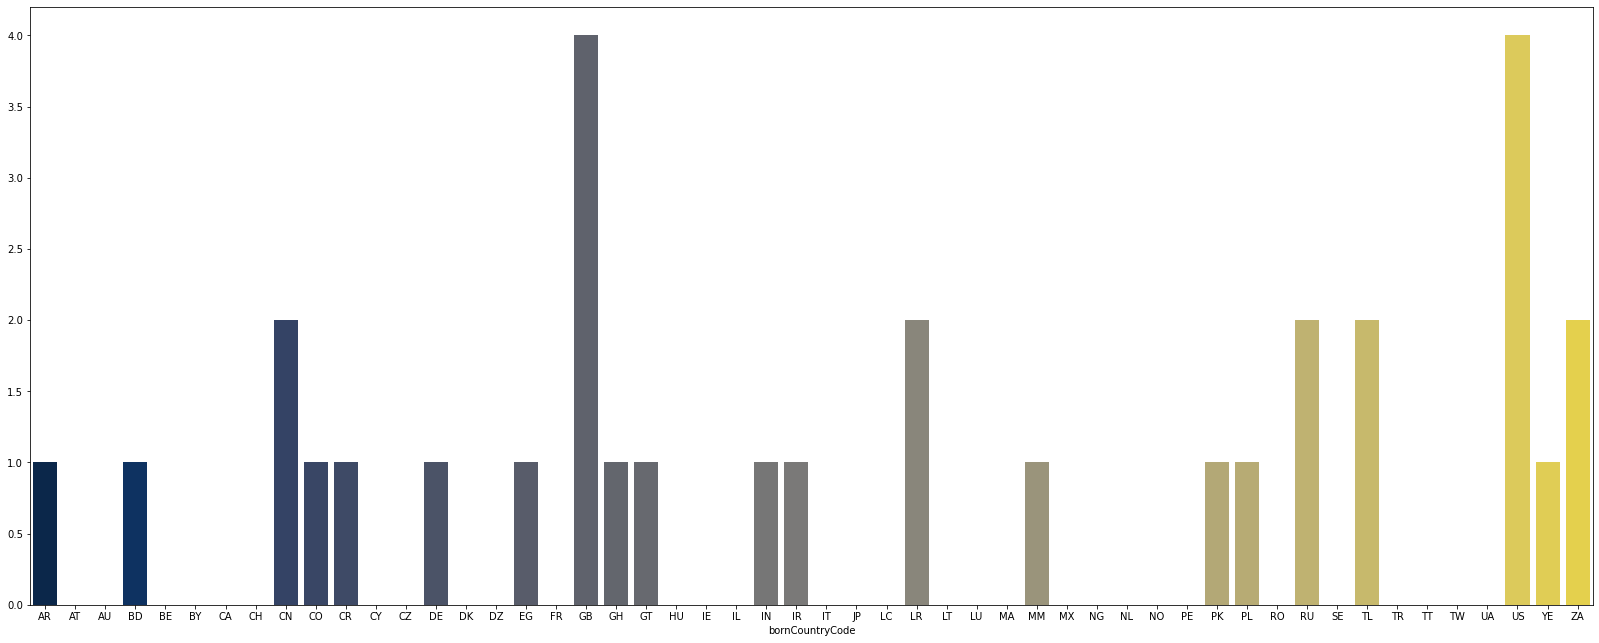

In [17]:
# Time to plot graphs
# Category: peace


CountryVsCat = alive2.groupby('bornCountryCode')['peace'].sum()
plt.figure(figsize=(28,11))
sn.barplot(x=CountryVsCat.index,y=CountryVsCat.values,palette = "cividis")

Text(0.5, 1.0, 'Chemistry - Counts')

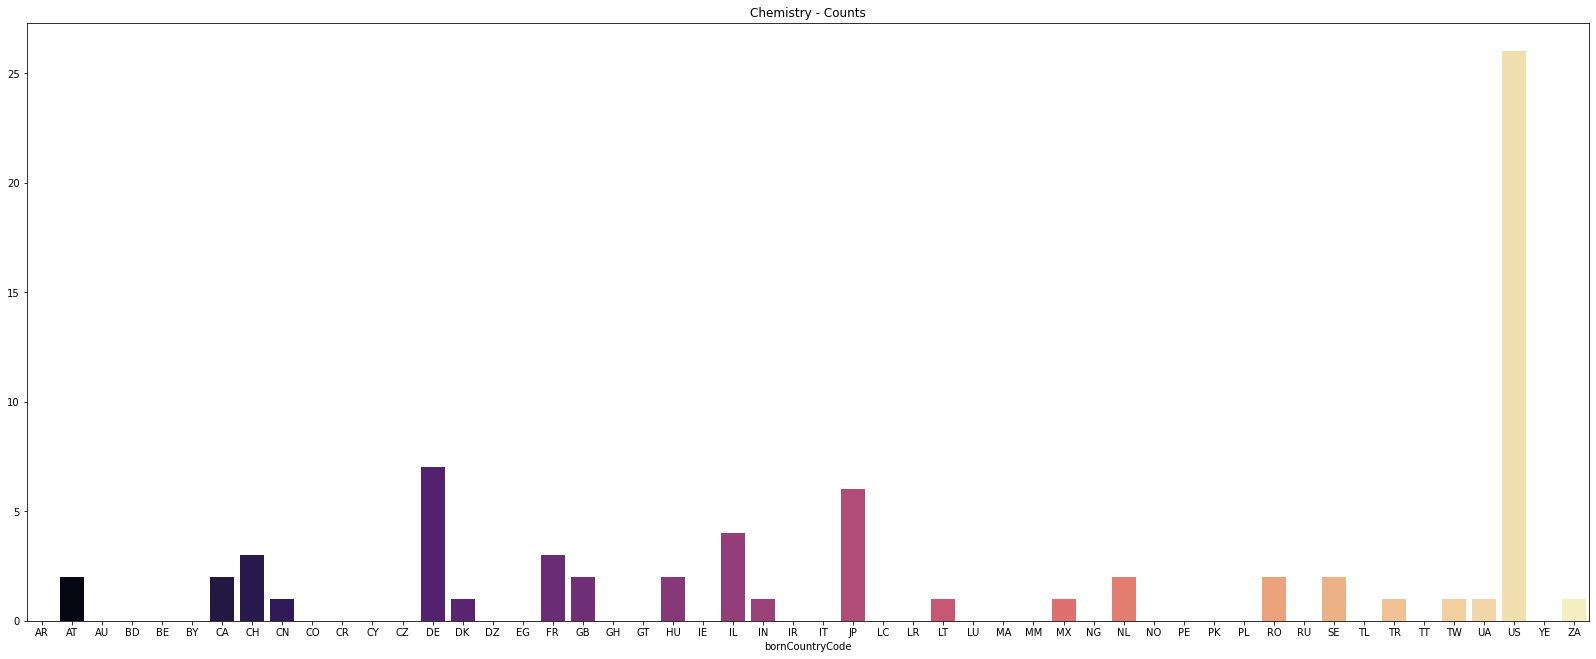

In [27]:
# Category: chemistry


CountryVsCat = alive2.groupby('bornCountryCode')['chemistry'].sum()
plt.figure(figsize=(28,11))
sn.barplot(x=CountryVsCat.index,y=CountryVsCat.values,palette = "magma").set_title("Chemistry - Counts")

Text(0.5, 1.0, 'literature - Counts')

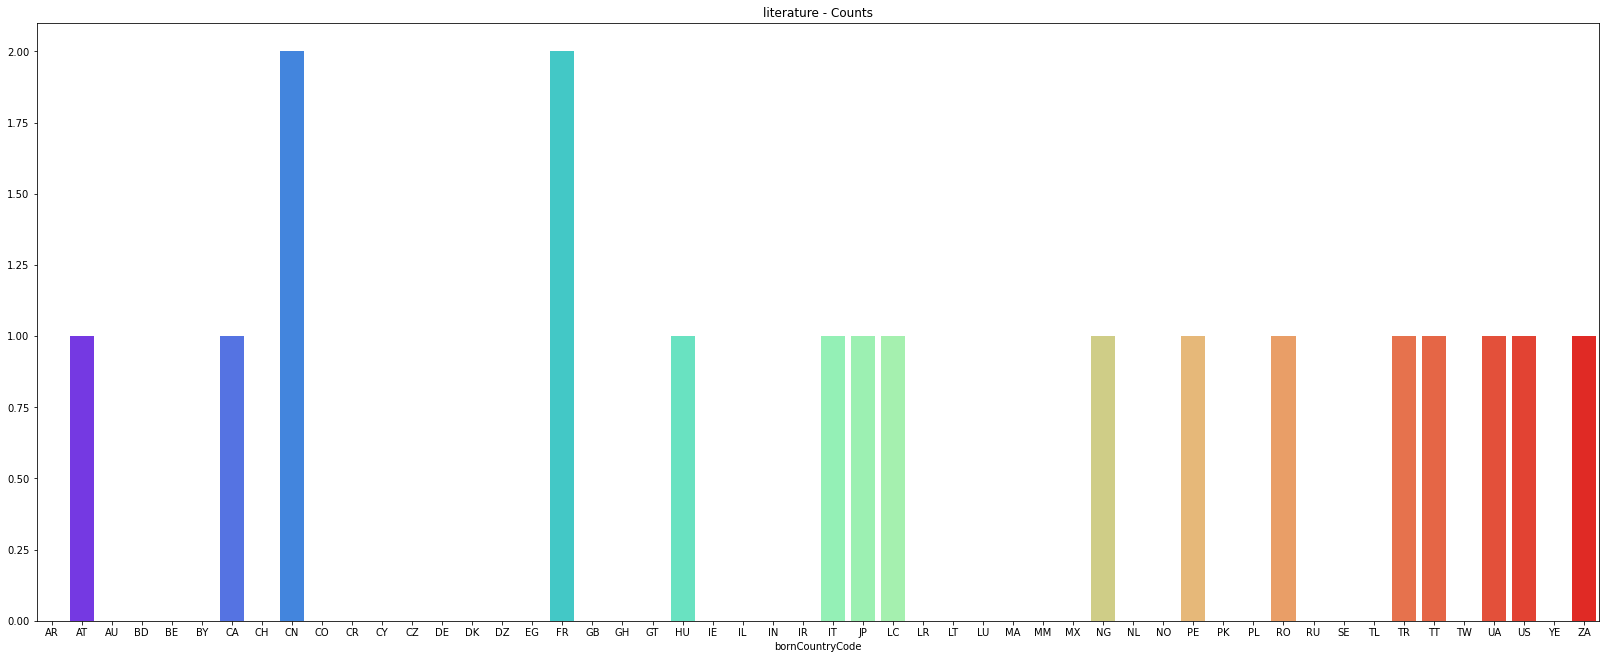

In [19]:
CountryVsCat = alive2.groupby('bornCountryCode')['literature'].sum()
plt.figure(figsize=(28,11))
sn.barplot(x=CountryVsCat.index,y=CountryVsCat.values,palette = "rainbow").set_title("literature - Counts")

Text(0.5, 1.0, 'economics - Counts')

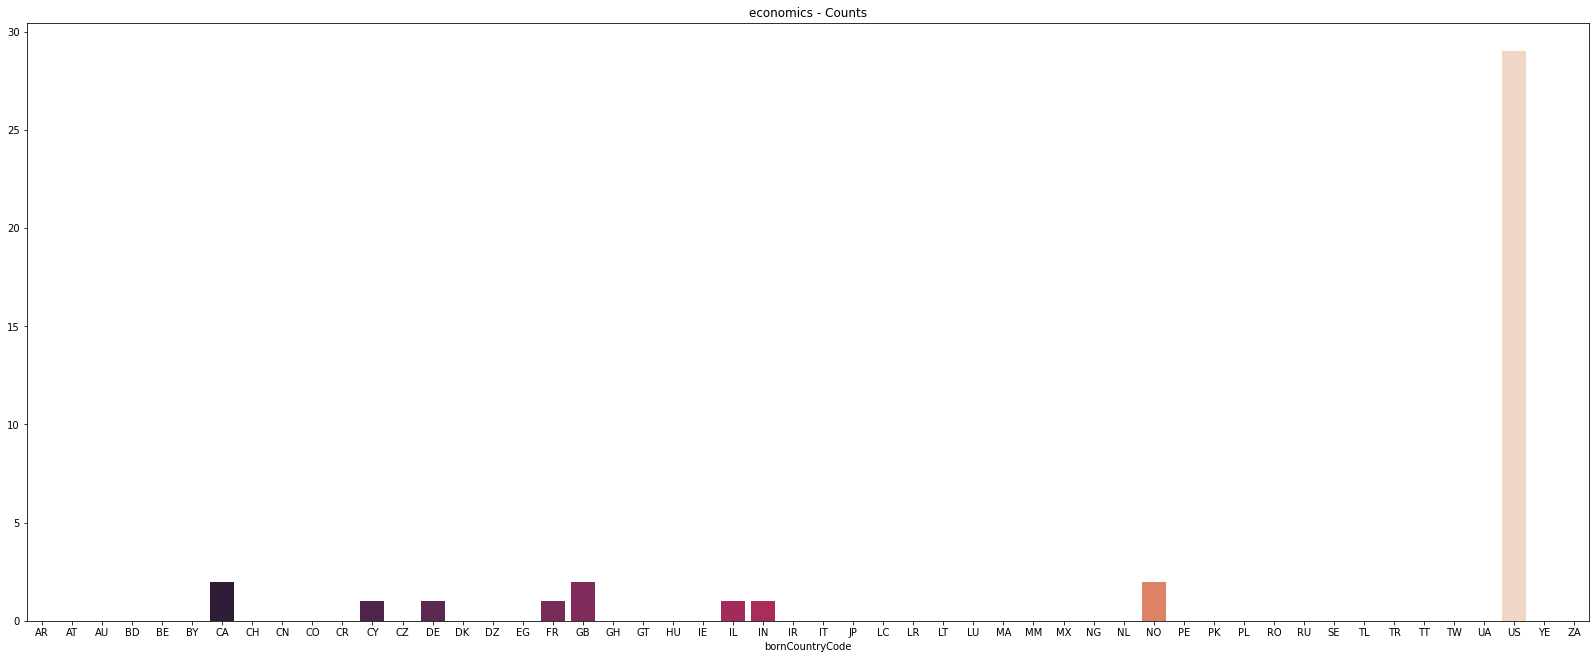

In [20]:
CountryVsCat = alive2.groupby('bornCountryCode')['economics'].sum()
plt.figure(figsize=(28,11))
sn.barplot(x=CountryVsCat.index,y=CountryVsCat.values,palette = "rocket").set_title("economics - Counts")

Text(0.5, 1.0, 'medicine - Counts')

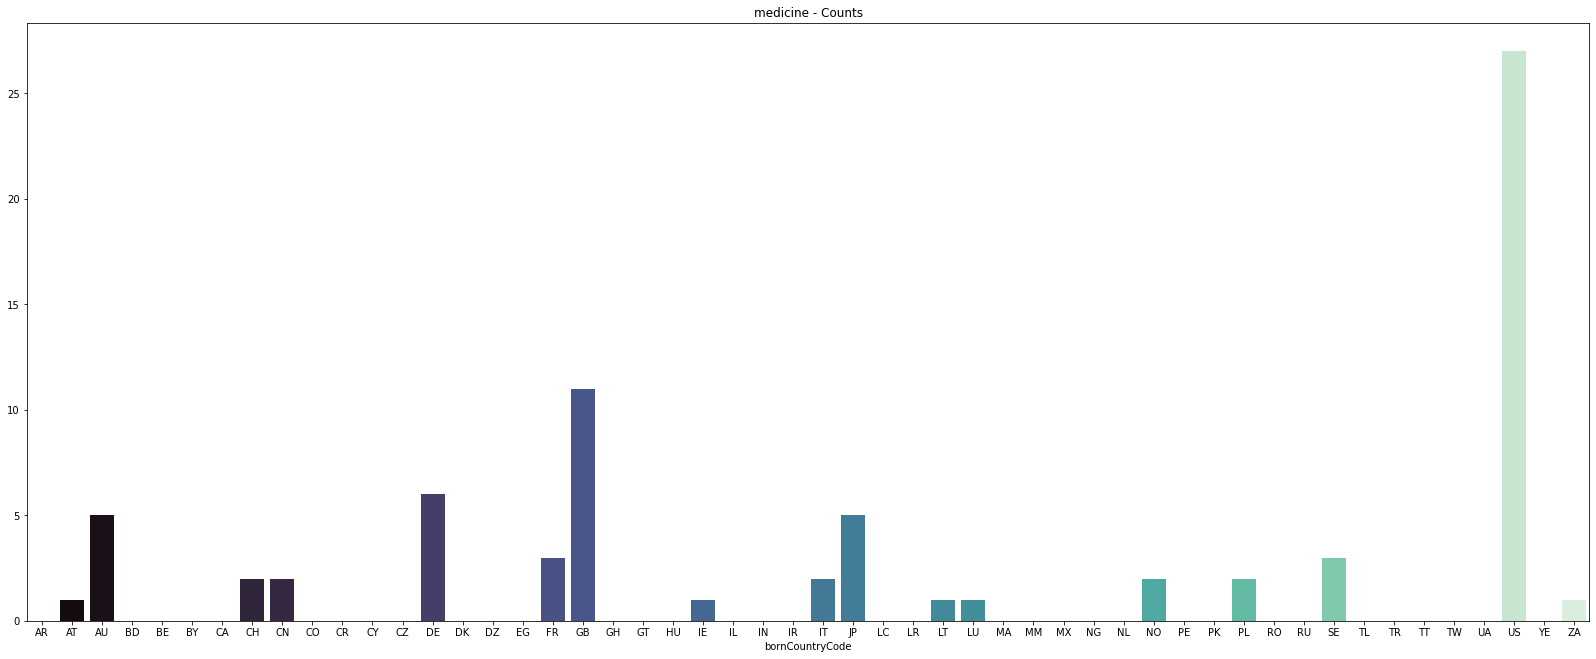

In [21]:
CountryVsCat = alive2.groupby('bornCountryCode')['medicine'].sum()
plt.figure(figsize=(28,11))
sn.barplot(x=CountryVsCat.index,y=CountryVsCat.values,palette = "mako").set_title("medicine - Counts")

Text(0.5, 1.0, 'physics - Counts')

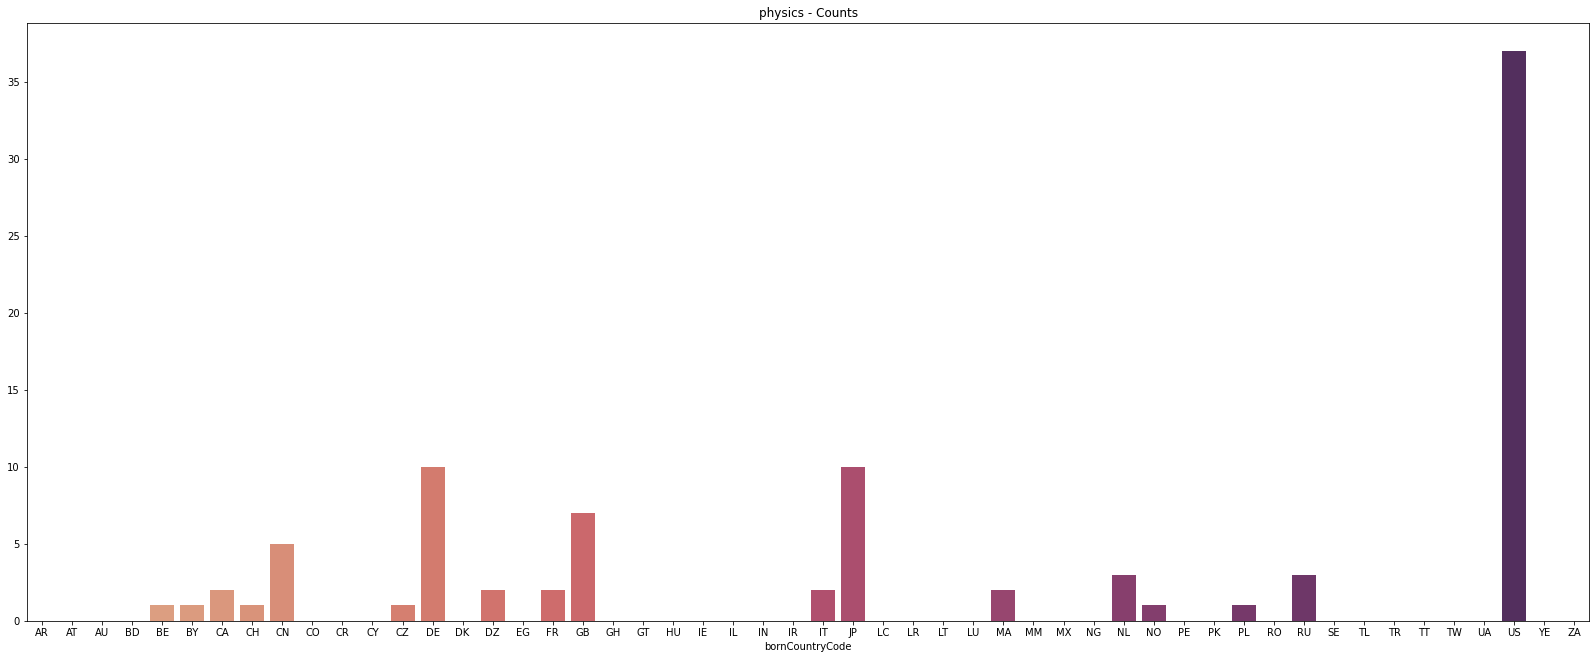

In [22]:
CountryVsCat = alive2.groupby('bornCountryCode')['physics'].sum()
plt.figure(figsize=(28,11))
sn.barplot(x=CountryVsCat.index,y=CountryVsCat.values,palette = "flare").set_title("physics - Counts")

Text(0.5, 1.0, 'Male Vs Female winner counts')

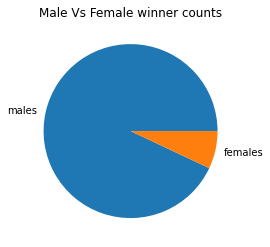

<Figure size 1800x792 with 0 Axes>

In [23]:
male_count = alive2['male'].value_counts().values[0]
female_count = alive2['female'].value_counts().values[1]
total = male_count+female_count
fig , ax = plt.subplots()
plt.figure(figsize=(25,11))

labels = ['males','females']
values1 = [((male_count/total)*100),((female_count/total)*100)]


ax.pie(values1,labels=labels)
ax.set_title("Male Vs Female winner counts")

### Conclusions:

1. More frequently the winners of Nobel prize were male gender

2. The United States had the higher number of Nobel prize winners

## Thank you